## Prediction of T-shirts demand
------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown
from matplotlib.ticker import PercentFormatter

import importlib
import utils
importlib.reload(utils)

sns.set_theme(style="whitegrid")
data_init = pd.read_csv("./t-shirts.csv")

X_COLUMNS = data_init.columns[:-1]

### 1. Data exploratin

In [2]:
data_init.info()
data_init.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   size      20000 non-null  object
 1   material  20000 non-null  object
 2   color     20000 non-null  object
 3   sleeves   20000 non-null  object
 4   demand    20000 non-null  object
dtypes: object(5)
memory usage: 781.4+ KB


,size,material,color,sleeves,demand
0,S,nylon,white,long,medium
1,XL,polyester,cream,short,high
2,S,silk,blue,short,medium
3,M,cotton,black,short,medium
4,XL,polyester,orange,long,medium


In [3]:
data_init.describe(include="all") 

,size,material,color,sleeves,demand
count,20000,20000,20000,20000,20000
unique,7,5,10,2,3
top,L,nylon,white,long,high
freq,4408,5652,3286,10117,8965


#### Pareto charts

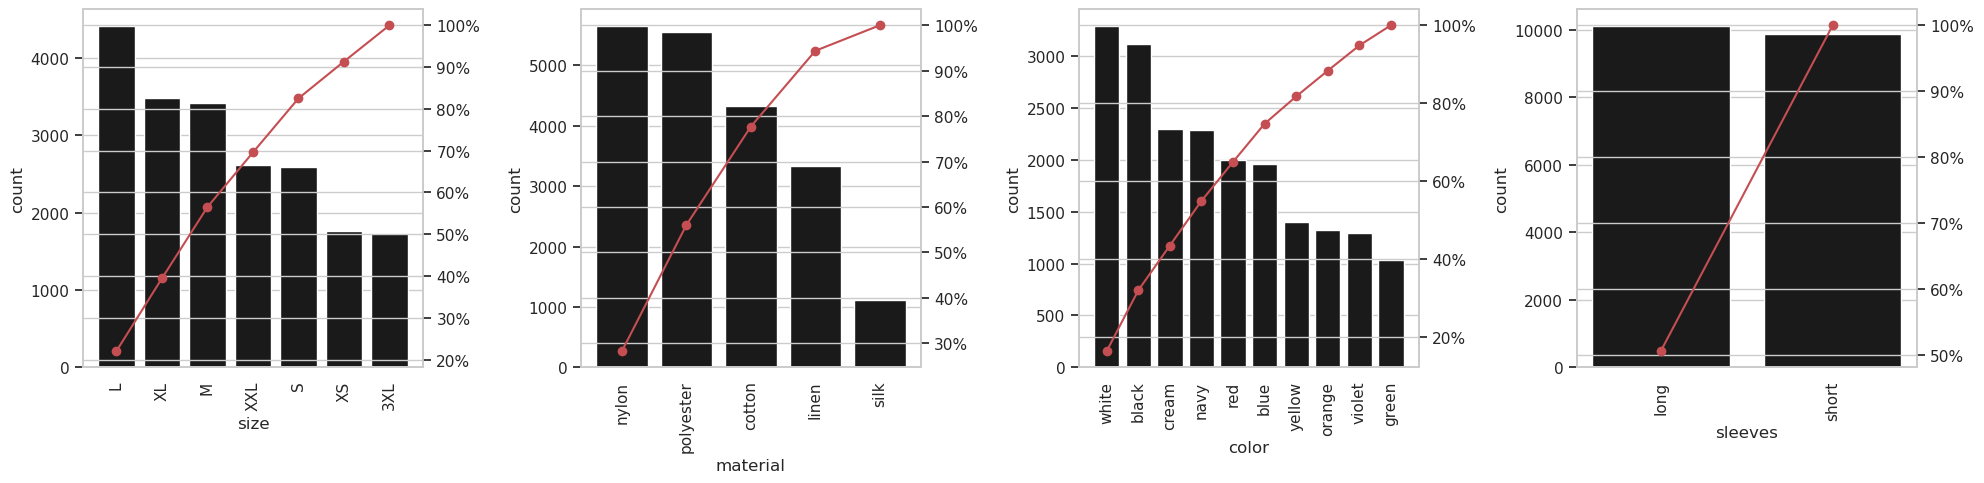

In [4]:
columns = iter(X_COLUMNS)
n = len(X_COLUMNS)
f, axs = plt.subplots(1,n, figsize=(20,5))

for ax in axs:
    column = next(columns)
    plot_data = data_init[[column]].groupby(column)[column].count().sort_values(ascending=False).reset_index(name='count')
    sns.barplot(x=column, y='count', data=plot_data, color=(.1, .1, .1, 1), ax=ax)
    
    pareto_line = plot_data['count'].cumsum()/plot_data['count'].sum()*100
    ax_pareto = ax.twinx()
    ax_pareto.yaxis.set_major_formatter(PercentFormatter())
    ax_pareto.plot(plot_data[column], pareto_line, color='r', marker='o', linestyle='-')
       
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

In [5]:
X, Y = data_init[X_COLUMNS], data_init[['demand']]

x_dummies = pd.get_dummies(X, drop_first=True, dtype=np.int64)
x_dummies

,size_L,size_M,size_S,size_XL,size_XS,size_XXL,material_linen,material_nylon,material_polyester,material_silk,color_blue,color_cream,color_green,color_navy,color_orange,color_red,color_violet,color_white,color_yellow,sleeves_short
0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
19996,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
19997,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
19998,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


#### PCA 

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_dummies)
x_scaled[0]

array([-0.53170394, -0.4536918 ,  2.59556235, -0.45897032, -0.31101727,
       -0.38775102, -0.44742824,  1.59328918, -0.62013074, -0.24390651,
       -0.32943065, -0.36029965, -0.23361125, -0.35950204, -0.26582666,
       -0.33333333, -0.26312131,  2.2553109 , -0.27445697, -0.98836765])

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(x_scaled)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(x_scaled)

print("Number of features before:", x_dummies.shape[1], " after:", X_pca.shape[1])

Number of features before: 20  after: 17


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, Y.values.reshape(-1), test_size=0.2, random_state=42)


In [9]:
from sklearn.naive_bayes import GaussianNB
import utils
import importlib
importlib.reload(utils)

utils.print_md('### Gaussian Naive Bayes')
model_gaussian = GaussianNB(var_smoothing=0.1)

model_gaussian.fit(X_train, y_train)
y_pred = model_gaussian.predict(X_test)
utils.evaluate_the_model(y_test, y_pred)

### Gaussian Naive Bayes

Accuracy: 0.746 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1397      |        39         |       367       |
| Actual: Medium |       20       |        218        |       219       |
|  Actual: High  |      283       |        88         |      1369       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.822   | 0.775  |  0.798   | 1803.0  |
|     low      |   0.632   | 0.477  |  0.544   |  457.0  |
|    medium    |    0.7    | 0.787  |  0.741   | 1740.0  |
|   accuracy   |   0.746   | 0.746  |  0.746   |  0.746  |
|  macro 

In [10]:
from sklearn.tree import DecisionTreeClassifier

utils.print_md('### DECISION TREE')
model_tree = DecisionTreeClassifier(random_state=42)

model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)
utils.evaluate_the_model(y_test, y_pred)


### DECISION TREE

Accuracy: 0.972 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1781      |         0         |       22        |
| Actual: Medium |       0        |        421        |       36        |
|  Actual: High  |       31       |        23         |      1686       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.983   | 0.988  |  0.985   | 1803.0  |
|     low      |   0.948   | 0.921  |  0.935   |  457.0  |
|    medium    |   0.967   | 0.969  |  0.968   | 1740.0  |
|   accuracy   |   0.972   | 0.972  |  0.972   |  0.972  |
|  macro 

In [12]:
from sklearn.svm  import SVC

utils.print_md('### SUPPORT VECTOR MACHINE')
model_svm = SVC(kernel='rbf', random_state=42)

model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
utils.evaluate_the_model(y_test, y_pred)


### SUPPORT VECTOR MACHINE

Accuracy: 0.9635 

Confusion Matrix:
+----------------+----------------+-------------------+-----------------+
|                | Predicted: Low | Predicted: Medium | Predicted: High |
+----------------+----------------+-------------------+-----------------+
|  Actual: Low   |      1769      |         0         |       34        |
| Actual: Medium |       0        |        402        |       55        |
|  Actual: High  |       49       |         8         |      1683       |
+----------------+----------------+-------------------+-----------------+

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|     high     |   0.973   | 0.981  |  0.977   | 1803.0  |
|     low      |   0.98    |  0.88  |  0.927   |  457.0  |
|    medium    |   0.95    | 0.967  |  0.958   | 1740.0  |
|   accuracy   |   0.964   | 0.964  |  0.964   |  0.964  |
|  macro

In [15]:
import libsvm
import libsvm.svm
import torch.optim as optim
import torch
import tqdm
import torch.nn as nn

class SVM(nn.Module):
    def __init__(self, kernel, C, gamma):
        super().__init__()
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.model = libsvm.svm.svm_model()

    def forward(self, x):
        return self.model(x, self.kernel, self.C, self.gamma)
    
    def predict(self, x):
        return libsvm.svm.svm_predict(x, self.model)
    
utils.print_md('### LIBSVM')
model_libsvm = SVM(kernel='rbf', C=1, gamma=0.1)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_libsvm.parameters(), lr=0.001)



n_epochs = 5
batch_size = 1

best_acc = - np.inf
best_weights = None

for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    model_libsvm.train()
    
    with tqdm.trange(len(training) // batch_size, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")

        for i in bar:
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size][1, :]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred) == torch.argmax(y_batch)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )

y_pred = model_libsvm.predict(X_test)
utils.evaluate_the_model(y_test, y_pred)


### LIBSVM

AttributeError: 'SVM' object has no attribute 'fit'